<a href="https://colab.research.google.com/github/sitiaisyah14/Machine-Learning_2022/blob/main/J10_Tugas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kupubiru.jpg to kupubiru.jpg


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

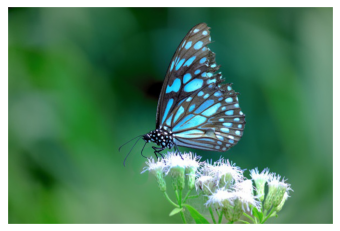

In [ ]:
import imageio
kupu = imageio.imread("kupubiru.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(kupu);

In [ ]:
kupu.shape

(400, 600, 3)

In [ ]:
data = kupu / 255.0
data = data.reshape(400 * 600, 3)
data.shape

(240000, 3)

In [ ]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

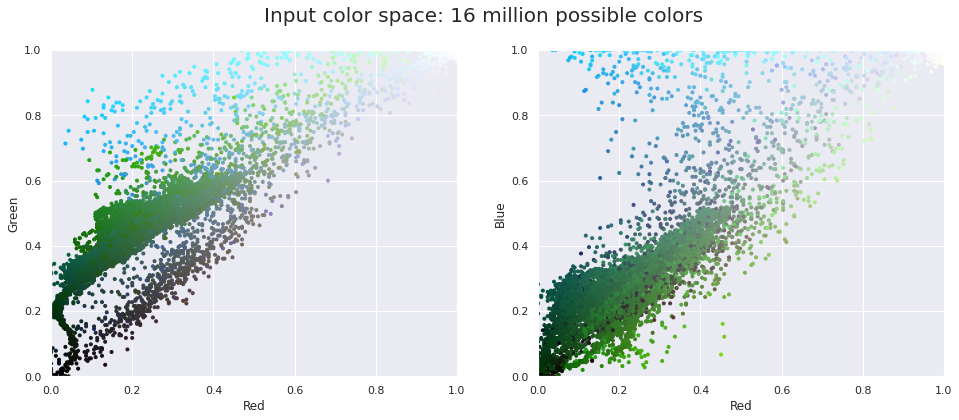

In [ ]:
plot_pixels(data, title='Input color space: 16 million possible colors')

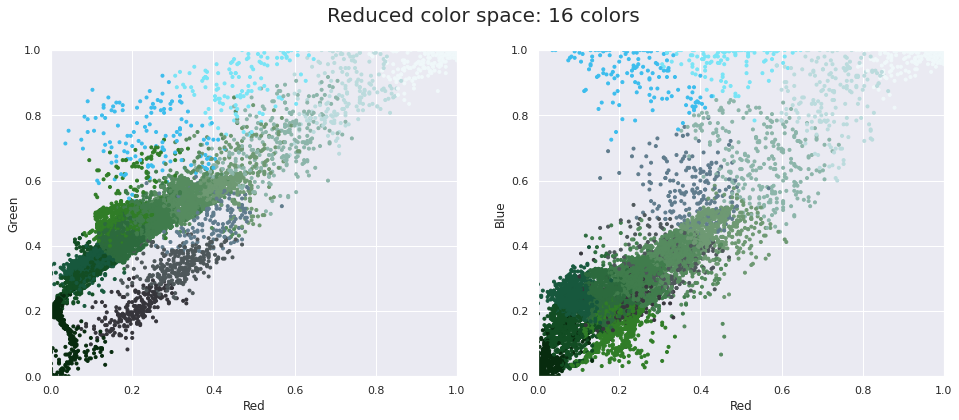

In [ ]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,title="Reduced color space: 16 colors")

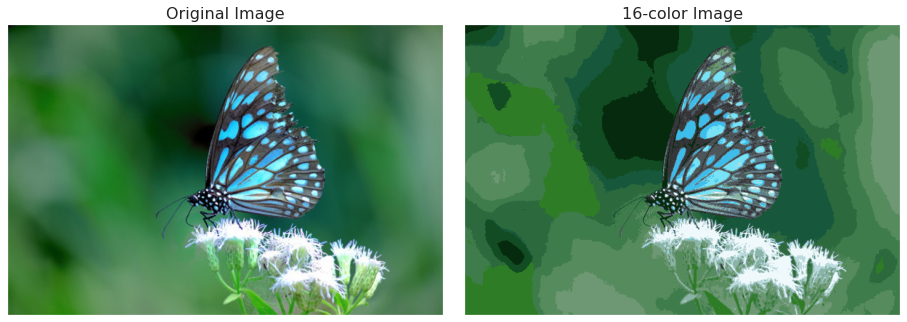

In [ ]:
kupu_recolored = new_colors.reshape(kupu.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(kupu)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(kupu_recolored)
ax[1].set_title('16-color Image', size=16);

# **Elbow Method dan visualisasi line chartnya**

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
def hitung_WSS(points, kmax):
    sse = []
    for k in range(1, kmax+1):
        kmeans = KMeans(n_clusters = k).fit(points)
        centroids = kmeans.cluster_centers_
        pred_clusters = kmeans.predict(points)
        curr_sse = 0
    
        for i in range(len(points)):
            curr_center = centroids[pred_clusters[i]]
            curr_sse += (points[i, 0] - curr_center[0]) * 2 + (points[i, 1] -curr_center[1]) * 2
        sse.append(curr_sse)
    return sse

In [ ]:
# Menentukan k_max
k_max = 8

In [ ]:
# Menyimpan Nilai WSS dalam y

y = hitung_WSS(data,k_max)

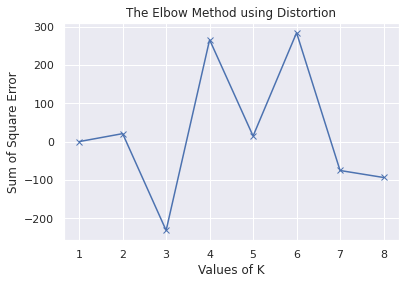

In [ ]:
# Tampilkan dalam Diagram Elbow 

plt.plot(range(1, 9), y, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Sum of Square Error')
plt.title('The Elbow Method using Distortion')
plt.show()

In [ ]:
# Print WSS

y

[1.6108187339547442e-08,
 20.720705348392126,
 -231.60940656773008,
 265.4496627758147,
 14.450865081628393,
 283.7604354840341,
 -75.39510652265369,
 -93.62657325244584]

# **silhoutte dan line chartnya**

In [ ]:
# Mengimport Library Silhouette Method

from sklearn.metrics import silhouette_score

In [ ]:
# Menginisialsisasi array untuk menyimpan nilai Silhouette

silhouette = []

In [ ]:
# Membuat perulangan untuk menghitung masing-masing nilai Silhouette

for k in range(2, k_max+1):
  kmeans = KMeans(n_clusters = k).fit(data)
  labels = kmeans.labels_
  silhouette.append(silhouette_score(data, labels, metric = 'euclidean'))

In [ ]:
# Mengeprint array silhouette

silhouette

[0.6650800680099634,
 0.449705876979285,
 0.3899762278260504,
 0.39152130945552505,
 0.36684715646068655,
 0.3497640235828072,
 0.35271312474218497]

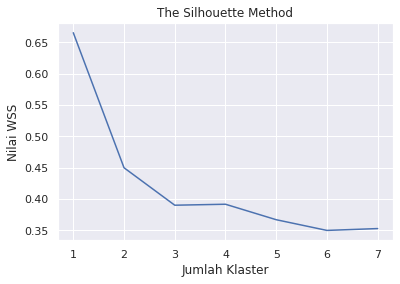

In [ ]:
# Menampilkan diagram silhouette method

xsilhouette = [1,2,3,4,5,6,7,]

plt.plot(xsilhouette, silhouette) 
plt.title('The Silhouette Method')
plt.xlabel('Jumlah Klaster') 
plt.ylabel('Nilai WSS') 
plt.show()